# Manipulação e tratamento de dados com Pandas

Quem disse que os conhecimentos de um cientista de dados não pode ajudar até um jogador de Fifa? O intuito desse projeto é esboçar na pratica como essa ferramenta pode ser útil para qualquer pessoa!


### Tópicos desse conteúdo
* Importando bibliotecas
* Carregamento dos dados
* Verificando metadado
* Funçõe básicas
* Manipulando
* Visualização

## Importando as bibliotecas

Importamos o Pandas e o Numpy para a manipulação dos dados. As outras duas bibliotecas, Seadorn e Matplotlib serão uteis para visualização dos dados. Caso deseja se apronfundar em cada uma delas, recomendo acessar suas respectivas documentações pois são bem completas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Obs:** utilizamos esse "%matplotlib inline" apenas para facilitar a visualização do conteúdo aqui no notebook.

### Carregamento dos dados

Nesse momento, precisaremos carregar nossos dados em um [Data Frame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), uma das estruturas basicas do Pandas. Para isso podemos utilizar diversos métodos padrão da biblioteca, ler arquivo um excel, CSV, HTM, Query SQL e ETC. Inclusive para quem trabalha com banco não relacional, podemos converter um cursor em DataFrame.

No nosso caso, temos um arquivo CSV, vamos carregar ele em uma variavel e ver o que acontece.


In [2]:
dataset = pd.read_csv('dataset/players_20.csv')
dataset

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,...,79+3,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
9,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,27,1992-06-15,175,71,Egypt,Liverpool,...,70+3,67+3,67+3,67+3,70+3,66+3,57+3,57+3,57+3,66+3


### Verificando metadado

Vamos rodar alguns comandos para ver com o que de fato estamos trabalhando.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


Eita! 18278 linhas. Normalmente, ao rodarmos o método ***info()*** conseguimos mais informações, porém estamos falando de um dataset de uma maior complexidade. Observe, são 104 colunas ao todo. Imagine manipular isso no Excel, seria algo bem trabalhoso.

Vamos ver se conseguimos obter mais informações a respeito das colunas

In [4]:
dataset.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [6]:
dataset.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


Até para verificar os nomes das colunas ja foi trabalhoso, manipular tudo isso então pode ser ainda mais dificil. Nesse caso, vamos selecionar algumas colunas importantes e fazer nossas análises.

### Funções básicas

Será que conseguiriamos responder a seguinte pergunta: Qual é a media de idade dos jogadores em atividade hoje?
É simples, tire uma média dos valores da coluna!


In [5]:
dataset['age'].mean()

25.283291388554545

Esta certo, quanto ao jogador mais velho: Seu nome, nacionalidade e idade.

In [6]:
dataset[dataset['age'] == dataset['age'].max()][['short_name', 'nationality', 'age']]

,short_name,nationality,age
11832,C. Muñoz,Argentina,42
13003,H. Sulaimani,Saudi Arabia,42


Nesse caso a maior idade é 42 e são dois jogadores que estão em ativa no esporte. Observe que no final da sentença, selecionamos apenas as colunas que desejamos obter, colocando dentro de duas colchetes. Poderiamos subistituir com qualquer outro nome de coluna que teriamos sucesso.

In [22]:
jogadores_acima_dos_40 = dataset[dataset['age'] >= 40]['short_name']
jogadores_acima_dos_40

200          G. Buffon
868             Hilton
1880        C. Pizarro
2963       D. Dainelli
2965         Cifuentes
3706      C. Lucchetti
4417        N. Rimando
4418         T. Howard
6235         J. Gillet
7230     Lee Dong Gook
8359         F. Cubero
10665         F. Kippe
10702       M. Caranta
11832         C. Muñoz
13003     H. Sulaimani
14527        D. Bulman
15812        M. Gurski
16314       K. Ellison
18233        Zhou Ting
Name: short_name, dtype: object

Dessa vez fizemos um pouco diferente, declaramos que uma nova variavel deve receber um conteúdo de um outro dataframe. Isso significa na pratica que ao alterar qualquer dado dessa nova variavel, os dados da variavel *dataset* que recebe as modificiações. Portanto, a nova variavel é apenas uma referencia de a um conjunto de dados de um dataframe original.

Vamos continuar. Como sabe a quantidade de pessoas que estão incluida nesse conjunto? Facil só ver o tamanho da Serie gerada!

In [19]:
jogadores_acima_dos_40.size

19

Quantos jogadores possuem notas gerais de suas habilidades acima do 90?

In [29]:
dataset[dataset['overall'] >= 90]['short_name'].size

10

E quantos estão entre 80 e 90?

In [7]:
dataset[(dataset['overall'] >= 80) & (dataset['overall'] < 90)]['short_name'].size

558

Perceba como podemos filtrar de diversas maneiras nosso dados? Basta selecionar as colunas e incluir as condições.

Ok, vamos para uma proxima. E se desejassemos saber quantos times ou quantos jogadores cada time tem? Use o metodo **value_counts()**

In [39]:
dataset['club'].value_counts()

Valencia CF                   33
CD Leganés                    33
Burnley                       33
Crystal Palace                33
1. FSV Mainz 05               33
Atlético Madrid               33
Manchester United             33
Tottenham Hotspur             33
Aston Villa                   33
FC Nantes                     33
Sheffield United              33
FC Augsburg                   33
Wolverhampton Wanderers       33
RB Leipzig                    33
Southampton                   33
Chelsea                       33
Athletic Club de Bilbao       33
Real Madrid                   33
Brighton & Hove Albion        33
Hellas Verona                 33
Everton                       33
FC Barcelona                  33
AS Monaco                     33
Real Valladolid CF            33
Arsenal                       33
Fortuna Düsseldorf            33
West Ham United               33
Leicester City                33
Udinese                       33
Paris Saint-Germain           33
          

*Obs:* Na pratica não existe time com apenas um jogador, como vemos acima. O correto é que antes de fazer qualquer processamento ou busca mais profunda, que realizemos uma limpeza dos dados, tirando os registros que de alguma forma estão corrompidos ou que não condizem com a verdade. Não iremos fazer isso, pois nosso desejo é apenas conhecer as principais funções do pandas.

O *value_counts()* é uma função de muita utilidade, pois podemos usar ela com qualquer tipagem (string, inteiro, float, datas e etc).

E quantos jogadores tem em média cada clube?

In [40]:
dataset['club'].value_counts().mean()

26.186246418338108


### Manipulando 

O que fazer quando queremos descobrir mais coisas, ou quem sabe gerar novas informações apartir do que ja temos?
Imagine que queremos encontrar os jogadores que estão acima do peso. Bom, temos altura e o peso de cada um, vamos encontrar o IMC?

**Crie uma nova coluna contendo o IMC dos jogadores**

In [3]:
dataset['imc'] = dataset['weight_kg'] / (dataset['height_cm']/100)**2
dataset[['short_name', 'imc']].head()

,short_name,imc
0,L. Messi,24.913495
1,Cristiano Ronaldo,23.735308
2,Neymar Jr,22.204082
3,J. Oblak,24.615211
4,E. Hazard,24.163265


Sabendo que IMC = Peso kg) / altura(M)², precisamos transformar apenas nossa altura em CM para metros. Olhe só, aparentemente os jogadores estão em forma! (Aaah sério)

In [48]:
dataset[['short_name', 'imc']].sort_values(by='imc', ascending=False).head(10)

,short_name,imc
10693,A. Akinfenwa,34.717839
15277,M. Al Bassas,30.421850
4950,S. Mosquera,29.761905
1243,R. Ábila,29.684956
13536,J. Morias,29.402920
9572,C. Seitz,29.330336
1888,W. Morgan,29.194126
3898,J. Plata,28.804414
532,Hulk,28.713211
7605,M. Barbieri,28.604765


Agora temos os nomes dos jogadores que devem ficar esperto com seu condicionamento físico! Esses são os top 10 IMC mais altos.

Vamos tentar colocar uma complexidade maior no que queremos descobrir. Talvez algo simples que poderiamos imaginar, mas requer um conhecimento um pouco mais: Qual é o salário dos jogadores em Reais? Quais sãos os clubes com os elencos mais caros? Vamos descobrir !

In [6]:
preco_euro = 5.39
dataset['valor_brl'] = dataset['value_eur'].apply(lambda valor: (valor * preco_euro)/1000000)
dataset['salario_brl'] = dataset['wage_eur'].apply(lambda salario: (salario * preco_euro)/1000)

Observe que dividimos o valor por 1 milhão e os salarios por mil, para facilidar a visualização das informações. Logo, teremos que ter em mente que os valores que serão mostrados serão referente ao valor em milhões e o salario em milhares.

Vamos ver dois ranking entre os 10 jogadores mais caros e os 10 maiores salários.

In [4]:
dataset[['short_name', 'valor_brl', 'salario_brl']].sort_values(by='valor_brl', ascending=False).head(10)

,short_name,valor_brl,salario_brl
2,Neymar Jr,568.645,1563.10
0,L. Messi,514.745,3045.35
10,K. Mbappé,503.965,835.45
5,K. De Bruyne,485.100,1994.30
4,E. Hazard,485.100,2533.30
12,H. Kane,447.370,1185.80
9,M. Salah,433.895,1293.60
7,V. van Dijk,420.420,1078.00
3,J. Oblak,417.725,673.75
23,P. Dybala,412.335,1158.85


In [5]:
dataset[['short_name', 'valor_brl', 'salario_brl']].sort_values(by='salario_brl', ascending=False).head(10)

,short_name,valor_brl,salario_brl
0,L. Messi,514.745,3045.35
4,E. Hazard,485.100,2533.30
1,Cristiano Ronaldo,315.315,2182.95
5,K. De Bruyne,485.100,1994.30
22,A. Griezmann,371.910,1994.30
19,L. Suárez,285.670,1913.45
8,L. Modrić,242.550,1832.60
36,T. Kroos,307.230,1778.70
17,S. Agüero,323.400,1617.00
21,Sergio Busquets,296.450,1617.00


In [6]:
times = dataset.groupby('club')
ranking_clubes = times.agg({'long_name': 'count', 'valor_brl': 'sum'}).sort_values(by='valor_brl', ascending=False)
ranking_clubes.head(10)

,long_name,valor_brl
club,,
Real Madrid,33,4839.41150
FC Barcelona,33,4685.52700
Manchester City,33,4558.56555
Juventus,33,3964.21025
Liverpool,33,3736.69835
FC Bayern München,23,3712.49725
Paris Saint-Germain,33,3705.89450
Tottenham Hotspur,33,3502.69150
Atlético Madrid,33,3182.12125


Esses são os 10 clubes com o elenco mais caro (O elenco do Real Madrid esta próximo dos 5 bilhões!!!!)

Vamos ver quanto representa o valor desses 10 clubes somados em relação ao total?

In [7]:
valor_top10 = ranking_clubes['valor_brl'][:10].sum()
valor_total = ranking_clubes['valor_brl'].sum()
valor_top10 / valor_total

0.15836997535858674

In [8]:
quantidade_de_time = dataset['club'].value_counts().count()
10 / quantidade_de_time

0.014326647564469915

Por mais que no primeiro momento 15 % não pareça ser um valor consideravel, temos que ter em mente que 10 times equivalem a nem 2% do nosso dataset. Nesse contexto, esses elencos tem uma diferença enorme comparado aos outros.

### Visualização

Foi proposto a utilização da biblioteca Seaborn, pela sua facilidade na hora de plotar os gráficos. Caso queira deixar seus gráficos totalmente personalizados, recomendo que você proucure conhecer o matplotlib.

Vamos lá, vamos começar referenciando em uma nova variavel alguns dados do nosso dataset, somente dos 100 jogadores com maior overall (Média total de pontos).

In [46]:
top_100 = dataset[['long_name', 'valor_brl', 'salario_brl', 'overall', 'team_position', 'nationality', 'age']].sort_values(by='overall', ascending=False).head(100)
top_100.head()

,long_name,valor_brl,salario_brl,overall,team_position,nationality,age
0,Lionel Andrés Messi Cuccittini,514.745,3045.35,94,RW,Argentina,32
1,Cristiano Ronaldo dos Santos Aveiro,315.315,2182.95,93,LW,Portugal,34
2,Neymar da Silva Santos Junior,568.645,1563.10,92,CAM,Brazil,27
3,Jan Oblak,417.725,673.75,91,GK,Slovenia,26
4,Eden Hazard,485.100,2533.30,91,LW,Belgium,28


Vamos ver quantos jogadores tem por nacionalidade nesse top 10? Antes disso, vamos apenas selecionar filtrar um pouco, pegando apenas o top10 paises nessa lista. Pegando essa lista, iremos filtrar os jogadores desse top100 por esses paises.

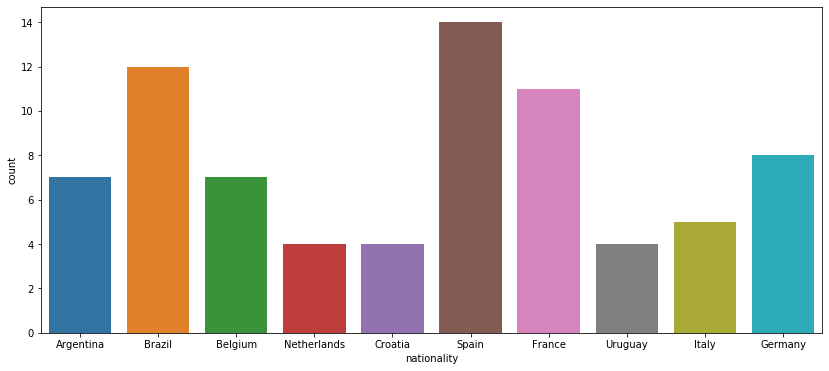

In [94]:
nome_paises_top10 = top_100['nationality'].value_counts().index[:10] #Os 10 paises com mais jogadores
jogadores_do_top10_paises = top_100[top_100['nationality'].isin(nome_paises_top10)]

plt.figure(figsize=(14,6)) #Alterando o tamanho do gráfico
sns.countplot(jogadores_do_top10_paises['nationality'])

Olha só, era de se esperar que iriamos encontrar os países com maiores quantidades de títulos de copa do mundo.

Vamos agora ver como esta a distruibuição do *overall* dos jogadores desse ranking?

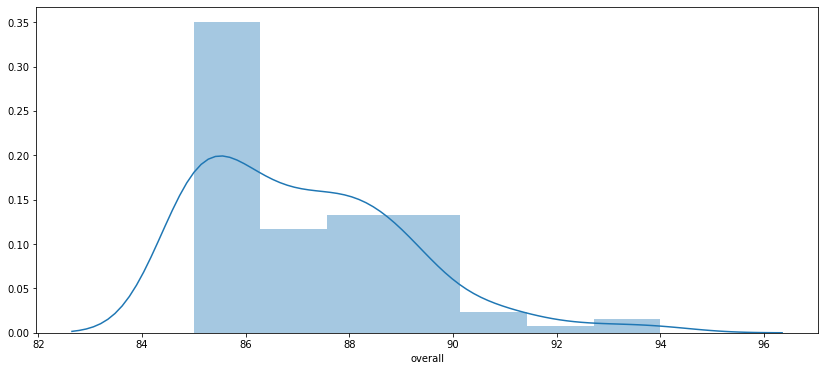

In [21]:
plt.figure(figsize=(14,6))
sns.distplot(top_100['overall'])

E se tentarmos correlacionar o *overall* dos jogadoes com seus respectivos salários? Será que na pratica, os jogadores com melhores habilidades de fato tem um salaŕio melhor? Vamos plotar essas informações, filtrando apenas com os jogadores que tem uma salário maior que 500k.

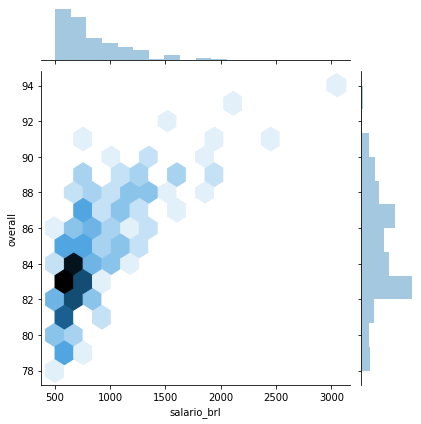

In [21]:
salario_500k = dataset[dataset['salario_brl'] > 500]
sns.jointplot(x="salario_brl", y="overall", data=salario_500k, kind='hex')

Parece que há uma tendencia sim, poderiamos até aplicar uma regressão linear e verificar se ela criaria um bom modelo de machine learning.

Vamos ver se os jogadores Brasileiros realmente tem habilidade nos pés? Vamos selecionar algumas posições e fazer uma comparação de suas habilidades. Primeiro vamos apenas criar uma nova coluna, preenchendo se o jogador é brasileiro ou não.

In [31]:
dataset['nacionalidade'] = dataset['nationality'].apply(lambda x: 'Brasileiro' if('Brazil'==x) else 'Outro')

Agora vamos utilizar um tipo de análise muito comum para entender a distruição da dados numéricos (boxplot). Ele ira mostrar as médias, as tendencias e os *outliers* (valores fora do normal).

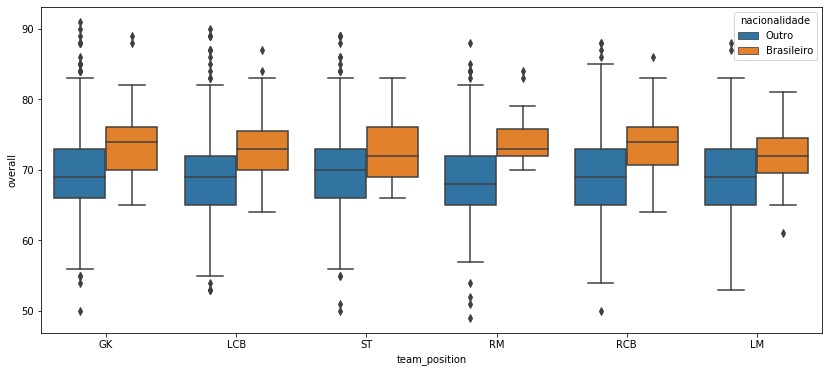

In [33]:
jogadores_por_posicoes = dataset[dataset['team_position'].isin(['GK', 'RCB','LCB', 'RM','LM', 'ST'])]

plt.figure(figsize=(14,6))
sns.boxplot(x='team_position', y='overall', data=jogadores_por_posicoes, hue='nacionalidade')

Olha só! Vencemos nas todas as 6 posições selecionadas (goleiro, zagueiros, meio campistas e atacantes).

Para finalizar, vamos tentar aplicar o famoso mapa de calor. Vamos gerar uma tabela dinamica, onde ira contar as nacionalidades dos jogadores e suas posições. Iremos simplesmente contar e ver a quantidade de jogadores por posição e por nacionalidade.

In [101]:
dataset

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lb,lcb,cb,rcb,rb,imc,valor_brl,salario_brl,nacionalidade,e
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,63+2,52+2,52+2,52+2,63+2,24.913495,514.7450,3045.35,Outro,1
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,61+3,53+3,53+3,53+3,61+3,23.735308,315.3150,2182.95,Outro,1
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,61+3,46+3,46+3,46+3,61+3,22.204082,568.6450,1563.10,Brasileiro,1
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,24.615211,417.7250,673.75,Outro,1
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,61+3,49+3,49+3,49+3,61+3,24.163265,485.1000,2533.30,Outro,1
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,73+3,66+3,66+3,66+3,73+3,21.366869,485.1000,1994.30,Outro,1
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,24.307244,363.8250,1347.50,Outro,1
7,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,...,81+3,87+3,87+3,87+3,81+3,24.698650,420.4200,1078.00,Outro,1
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,79+3,72+3,72+3,72+3,79+3,22.309356,242.5500,1832.60,Outro,1
9,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,27,1992-06-15,175,71,Egypt,Liverpool,...,66+3,57+3,57+3,57+3,66+3,23.183673,433.8950,1293.60,Outro,1


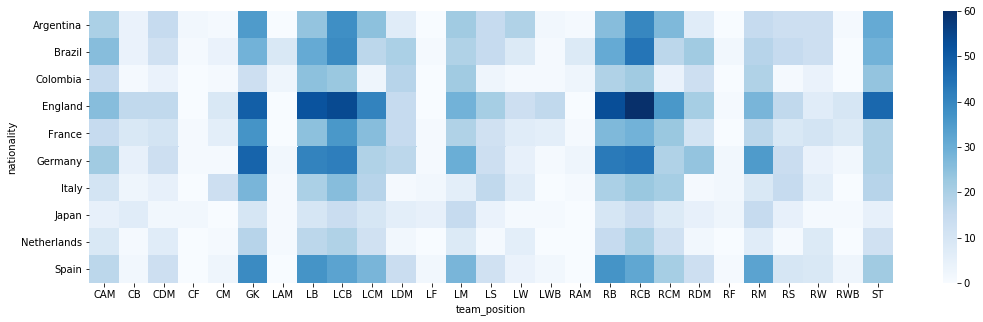

In [102]:
nome_paises_top10 = dataset['nationality'].value_counts().index[:10]
jogadores_do_top10_paises = dataset[dataset['nationality'].isin(nome_paises_top10) & ~dataset['team_position'].isin(['RES','SUB'])]


table = jogadores_do_top10_paises.pivot_table(values='overall',index='nationality',columns='team_position', fill_value=0, aggfunc=len)
plt.figure(figsize=(18,5))
sns.heatmap(table, cmap='Blues')

Nos parece que os ingleses e os alemãos sãos os que mais tem jogadores. Se você joga fifa saberá nos responder o motivo. A Eletronic Arts, empresa responsável pelo game, tem parceria com as muitas ligas desses paises, e por isso tem mais times e consequentemente mais jogadores.

Gostou? Se você tem um perfil analítico, gosta de manipular dados e gerar conhecimento através deles, recomendo fortemente que inicie seus estudos com essa ferramente. É claro que ela irá que é essencial que alinhe com outros estudos como matemática e estatística, pos na prática essas ferramentas só irão te ajuda no **como fazer** e não no **o que fazer**.

Um forte abraço e até a próxima.